In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import nibabel as nib
import random

In [5]:
Vect_vox=[]

for i in range(1000):
    fold='SLA'+str(i+1)+'_50'
    V0 = nib.load(os.path.join('..', 'data',fold,'smooth_5_5','reg_6_6','der_1_1','spmT_0001.nii')).get_data().flatten()
    V1 = nib.load(os.path.join('..', 'data',fold,'smooth_5_5','reg_6_6','der_1_1','mask.nii')).get_data().flatten()
    V0bis=V0[V1!=0].tolist()
    Vect_vox=Vect_vox+V0bis

In [6]:
len(Vect_vox)

155911497

In [26]:
np.random.seed(0)
Vect_vox_sample=random.sample(Vect_vox,1000000)

(array([1.000000e+00, 3.000000e+00, 2.000000e+00, 4.000000e+00,
        3.000000e+00, 4.000000e+00, 9.000000e+00, 1.800000e+01,
        1.800000e+01, 4.100000e+01, 5.500000e+01, 1.120000e+02,
        2.180000e+02, 3.550000e+02, 5.590000e+02, 9.290000e+02,
        1.412000e+03, 2.368000e+03, 3.566000e+03, 5.545000e+03,
        8.419000e+03, 1.268300e+04, 1.931300e+04, 2.853400e+04,
        4.246600e+04, 6.192600e+04, 8.851800e+04, 1.260040e+05,
        1.769160e+05, 2.439030e+05, 3.314280e+05, 4.459950e+05,
        5.909510e+05, 7.737040e+05, 9.952500e+05, 1.263370e+06,
        1.582717e+06, 1.948663e+06, 2.363587e+06, 2.828139e+06,
        3.331706e+06, 3.864599e+06, 4.414965e+06, 4.977538e+06,
        5.526319e+06, 6.041678e+06, 6.506518e+06, 6.901217e+06,
        7.227120e+06, 7.436983e+06, 7.555416e+06, 7.563077e+06,
        7.458659e+06, 7.245112e+06, 6.936446e+06, 6.538648e+06,
        6.076326e+06, 5.561969e+06, 5.011748e+06, 4.452038e+06,
        3.898539e+06, 3.358488e+06, 2.85

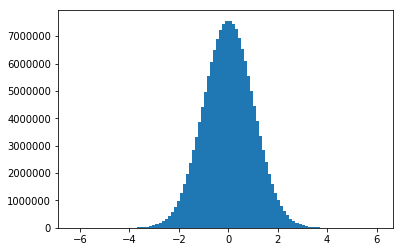

In [44]:
plt.hist(Vect_vox,bins=100)

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


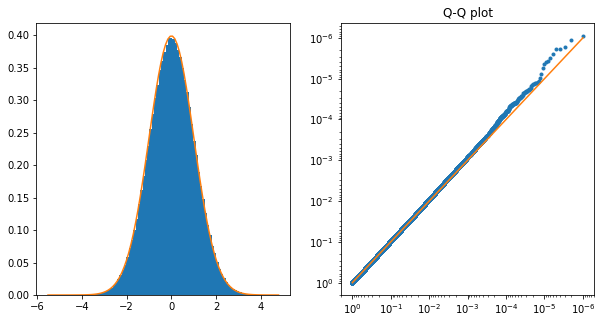

In [43]:
num_bins=100

f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(10,5))

n, bins, patches = ax1.hist(np.array(Vect_vox_sample),num_bins,normed=1)
dist = scipy.stats.norm
y=dist.pdf(bins)
ax1.plot(bins, y, '-')

p_th = [t/len(Vect_vox_sample) for t in range(1,len(Vect_vox_sample)+1)]
line1, = ax2.loglog(p_th, sorted(dist.sf(np.array(Vect_vox_sample))), '.', linewidth=1,
                     label='Q-Q plot')
ax2.plot(p_th, p_th, '-')
ax2.set_title('Q-Q plot')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()